## HOG, or Histogram of Oriented Gradients, is a feature descriptor that is often used to extract features from image data. It is widely used in computer vision tasks for object detection**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import math
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def global_gradient(img):
    gradient_values_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    gradient_values_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = cv2.addWeighted(gradient_values_x, 0.5, gradient_values_y, 0.5, 0)
    gradient_angle = cv2.phase(gradient_values_x, gradient_values_y, angleInDegrees=True)
    return gradient_magnitude,gradient_angle

In [3]:
def cell_gradient(cell_magnitude, cell_angle):
        orientation_centers = [0] * bin_size
        for i in range(cell_magnitude.shape[0]):
            for j in range(cell_magnitude.shape[1]):
                gradient_strength = cell_magnitude[i][j]
                gradient_angle = cell_angle[i][j]
                #print("gradient_strength",gradient_strength)
                #print("gradient_angle",gradient_angle)
                min_angle, max_angle, mod = get_closest_bins(gradient_angle)
                #print("min_angle",min_angle)
                #print("max_angle",max_angle)
                #print("mod",mod)
                orientation_centers[min_angle] += (gradient_strength * (1 - (mod / angle_unit)))
                orientation_centers[max_angle] += (gradient_strength * (mod / angle_unit))
                #print(orientation_centers)
        return orientation_centers

In [4]:
 def get_closest_bins(gradient_angle):
        idx = int(gradient_angle / angle_unit)
        mod = gradient_angle % angle_unit
        #print("idx",idx)
        #print("mod",mod)
        if idx == bin_size:
            return idx - 1, (idx) % bin_size, mod
        return idx, (idx + 1) % bin_size, mod

In [5]:
def extract(img):
        height, width = img.shape
        print("Image height :- ",height)
        print("Image width :- ",width)
        print("cell_size :- ",cell_size)
        print("bin_size :- ",bin_size)
        print("angle_unit :- ",angle_unit)
        gradient_magnitude, gradient_angle = global_gradient(img)
        gradient_magnitude = abs(gradient_magnitude)
        cell_gradient_vector = np.zeros((int(height / cell_size), int(width / cell_size), bin_size))
        print("cell_gradient_vector shape :- ",cell_gradient_vector.shape)
        for i in range(cell_gradient_vector.shape[0]):
            for j in range(cell_gradient_vector.shape[1]):
                cell_magnitude = gradient_magnitude[i * cell_size:(i + 1) * cell_size,
                                 j * cell_size:(j + 1) * cell_size]
                cell_angle = gradient_angle[i * cell_size:(i + 1) * cell_size,
                             j * cell_size:(j + 1) * cell_size]
                cell_gradient_vector[i][j] = cell_gradient(cell_magnitude, cell_angle)

        hog_image = render_gradient(np.zeros([height, width]), cell_gradient_vector)
        hog_vector = []
        for i in range(cell_gradient_vector.shape[0] - 1):
            for j in range(cell_gradient_vector.shape[1] - 1):
                block_vector = []
                block_vector.extend(cell_gradient_vector[i][j])
                block_vector.extend(cell_gradient_vector[i][j + 1])
                block_vector.extend(cell_gradient_vector[i + 1][j])
                block_vector.extend(cell_gradient_vector[i + 1][j + 1])
                mag = lambda vector: math.sqrt(sum(i ** 2 for i in vector))
                magnitude = mag(block_vector)
                if magnitude != 0:
                    normalize = lambda block_vector, magnitude: [element / magnitude for element in block_vector]
                    block_vector = normalize(block_vector, magnitude)
                hog_vector.append(block_vector)
        return hog_vector, hog_image

In [6]:
def render_gradient(image, cell_gradient):
        cell_width = cell_size / 2
        max_mag = np.array(cell_gradient).max()
        for x in range(cell_gradient.shape[0]):
            for y in range(cell_gradient.shape[1]):
                cell_grad = cell_gradient[x][y]
                cell_grad /= max_mag
                angle = 0
                angle_gap = angle_unit
                for magnitude in cell_grad:
                    angle_radian = math.radians(angle)
                    x1 = int(x * cell_size + magnitude * cell_width * math.cos(angle_radian))
                    y1 = int(y * cell_size + magnitude * cell_width * math.sin(angle_radian))
                    x2 = int(x * cell_size - magnitude * cell_width * math.cos(angle_radian))
                    y2 = int(y * cell_size - magnitude * cell_width * math.sin(angle_radian))
                    cv2.line(image, (y1, x1), (y2, x2), int(255 * math.sqrt(magnitude)))
                    angle += angle_gap
        return image

In [7]:
img = cv2.imread('../input/hogfeatures/man-walking.jpg', cv2.IMREAD_GRAYSCALE)
img=np.sqrt(img/float(np.max(img)))
img=img*255
cell_size=8
bin_size=9
angle_unit =360/bin_size
#hog = Hog_descriptor(img, cell_size=8, bin_size=8)
vector, image = extract(img)


Image height :-  1023
Image width :-  682
cell_size :-  8
bin_size :-  9
angle_unit :-  40.0
cell_gradient_vector shape :-  (127, 85, 9)


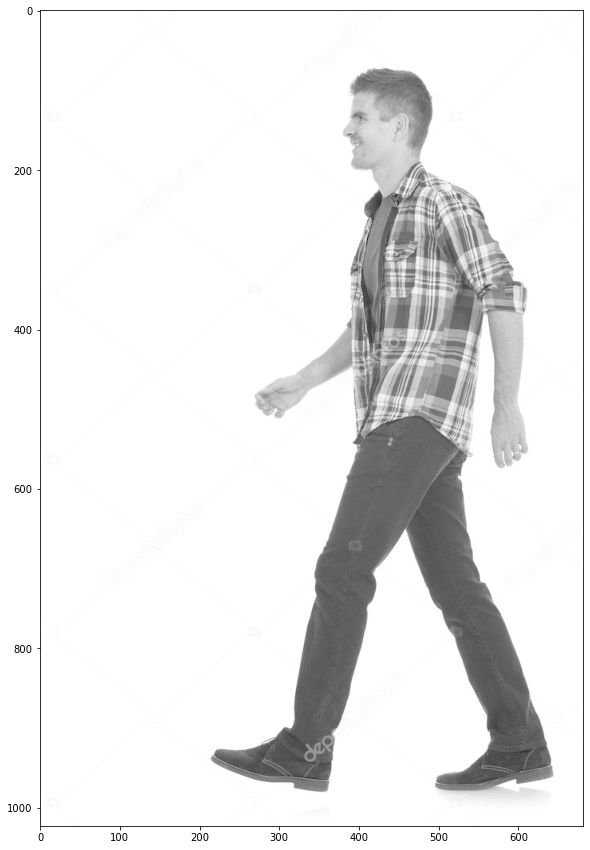

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

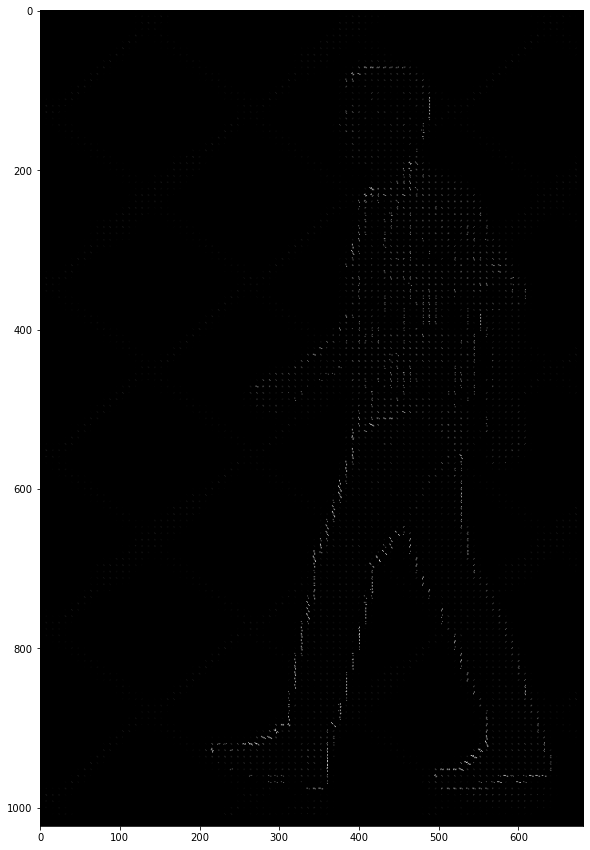

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [10]:
vector=np.array(vector)

In [11]:
vector.shape

(10584, 36)